# Bayesian analyses and MCMC

## Defining priors

In [1]:
from likelihood import Priors, LikelihoodFunction
from equations import DM_EXT_model

model = DM_EXT_model()

# Defining the prior intervals manually
#intervals_constant = [(0, 1), (20, 100), (55, 225)]  # H_0, Omega_m, omega_0
intervals_constant = [(0, 100), (0, 300), (-9, 5), (-3, 0)]  # H_0, Omega_m, omega_0
intervals_p2 = [(0, 120), (0, 300), (-9, 5), (-3, 0), (-3, 3)]  # H_0, Omega_m, omega_0, omega_a
intervals_p3 = [(20, 80), (55, 225), (-5, 5), (-3, 0), (-3, 3)]  # H_0, Omega_m, omega_0, omega_a

# Creating specific instances of the priors
#P_constant = Priors(['\\Omega_m', 'H_0', '\\omega_0', 'DM_{host,0}'], intervals_constant)
P_constant = Priors(['H_0', 'A', '\\beta', '\\omega_0'], intervals_constant)
P_p2 = Priors(['H_0', 'A', '\\beta', '\\omega_0', '\\omega_a'], intervals_p2)
P_p3 = Priors(['H_0', 'A', '\\beta', '\\omega_0', '\\omega_a'], intervals_p3)

# Creating an instance of the likelihood model
LF_constant = LikelihoodFunction(
    lambda z, H_0, A, beta, omega_0: model.DM_ext_th(
        z=z,
        f_IGM=0.83,
        #DM_host_0=96*(1+z)**0.83,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        A=A,
        beta=beta,
        omega_0=omega_0,
        cosmo_type='non_standard',
        param_type='constant'
    )
)

LF_p2 = LikelihoodFunction(
    lambda z, H_0, A, beta, omega_0, omega_a: model.DM_ext_th(
        z=z,
        f_IGM=0.83,
        #DM_host_0=96*(1+z)**0.83,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        A=A,
        beta=beta,
        omega_0=omega_0,  
        omega_a=omega_a,
        cosmo_type='non_standard',
        param_type='CPL'
    )
)

LF_p3 = LikelihoodFunction(
    lambda z, H_0, A, beta, omega_0, omega_a: model.DM_ext_th(
        z=z,
        f_IGM=0.83,
        #DM_host_0=96*(1+z)**0.83,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        A=A,
        beta=beta,
        omega_0=omega_0,  
        omega_a=omega_a,
        cosmo_type='non_standard',
        param_type='BA'
    )
)

## Preparing the samples

### Analysis for 16 FRBs

In [2]:
from obs_data import FRB_data
import ultranest

# Instantiate the FRB_data class for 16 FRBs
frb_data_16 = FRB_data(n_frb=16)

# Call the select_data method to get the observed data
z_obs_16, DM_obs_ext_16, DM_obs_ext_error_16 = frb_data_16.select_data()

z_values_16 = z_obs_16
dm_ext_obs_16 = DM_obs_ext_16
dm_ext_errors_16 =  DM_obs_ext_error_16

# Configuring the ultranest samplers
sampler_constant_16 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_constant.prior_transform
)

sampler_p2_16 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_p2.prior_transform
)

sampler_p3_16 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_p3.prior_transform
)

### Analysis for 50 FRBs

In [3]:
"""# Instantiate the FRB_data class for 50 FRBs
frb_data_50 = FRB_data(n_frb=50)

# Call the select_data method to get the observed data
z_obs_50, DM_obs_ext_50, error_plus_50, error_minus_50 = frb_data_50.select_data()

z_values_50 = z_obs_50
dm_ext_obs_50 = DM_obs_ext_50
dm_error_plus_50 =  error_plus_50
dm_error_minus_50 =  error_minus_50

# Configuring the ultranest samplers
sampler_constant_50 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_constant.prior_transform
)

sampler_p2_50 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_p2.prior_transform
)

sampler_p3_50 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_p3.prior_transform
)"""

'# Instantiate the FRB_data class for 50 FRBs\nfrb_data_50 = FRB_data(n_frb=50)\n\n# Call the select_data method to get the observed data\nz_obs_50, DM_obs_ext_50, error_plus_50, error_minus_50 = frb_data_50.select_data()\n\nz_values_50 = z_obs_50\ndm_ext_obs_50 = DM_obs_ext_50\ndm_error_plus_50 =  error_plus_50\ndm_error_minus_50 =  error_minus_50\n\n# Configuring the ultranest samplers\nsampler_constant_50 = ultranest.ReactiveNestedSampler(\n    P_constant.param_names,\n    lambda params: LF_constant.log_likelihood(\n        params,\n        z_values=z_values_50,\n        y_obs=dm_ext_obs_50,\n        err_pos=error_plus_50,\n        err_neg=error_minus_50\n    ),\n    P_constant.prior_transform\n)\n\nsampler_p2_50 = ultranest.ReactiveNestedSampler(\n    P_p2.param_names,\n    lambda params: LF_p2.log_likelihood(\n        params,\n        z_values=z_values_50,\n        y_obs=dm_ext_obs_50,\n        err_pos=error_plus_50,\n        err_neg=error_minus_50\n    ),\n    P_p2.prior_transfor

### Analysis for 64 FRBs

In [4]:
# Instantiate the FRB_data class for 16 FRBs
frb_data_64 = FRB_data(n_frb=64)

# Call the select_data method to get the observed data
z_obs_64, DM_obs_ext_64, DM_obs_ext_error_64 = frb_data_64.select_data()

z_values_64 = z_obs_64
dm_ext_obs_64 = DM_obs_ext_64
dm_ext_errors_64 =  DM_obs_ext_error_64

# Configuring the ultranest samplers
sampler_constant_64 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_64,
        y_obs=dm_ext_obs_64,
        errors=dm_ext_errors_64
    ),
    P_constant.prior_transform
)

sampler_p2_64 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_64,
        y_obs=dm_ext_obs_64,
        errors=dm_ext_errors_64
    ),
    P_p2.prior_transform
)

sampler_p3_64 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_64,
        y_obs=dm_ext_obs_64,
        errors=dm_ext_errors_64
    ),
    P_p3.prior_transform
)

In [5]:
result1_16 = sampler_constant_16.run(min_num_live_points=400)
sampler_constant_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5  9 [-4.6660..-4.6659]*| it/evals=3091/18354 eff=17.2162% N=400  
[ultranest] Likelihood function evaluations: 18377
[ultranest]   logZ = -7.779 +- 0.05141
[ultranest] Effective samples strategy satisfied (ESS = 1707.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.05, need <0.5)
[ultranest]   logZ error budget: single: 0.07 bs:0.05 tail:0.01 total:0.05 required:<0.50
[ultranest] done iterating.

logZ = -7.777 +- 0.126
  single instance: logZ = -7.777 +- 0.068
  bootstrapped   : logZ = -7.779 +- 0.126
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 0     │▁▂▂▁▂▂▁▂▂▂▂▃▂▄▃▄▄▄▅▅▆▇▇▇▇▆▇▇▆▇▆▄▄▅▃▂▂▁▁│100       58 +- 21
    A                   : 0     │▁▁▁▁▁▁▁▂▂▃▄▄▄▄▅▆▇▇▇▇▇▇▇▆▇▅▄▄▂▄▃▂▂▁▁▁▁▁▁│300       155 +- 52
    \beta               : -9.0  │▂▂▂▃▃▂▃▄▄▄▅▅▅▆▅▅▅▆▆▇

In [6]:
"""result1_50 = sampler_constant_50.run(min_num_live_points=400)
sampler_constant_50.print_results()"""

'result1_50 = sampler_constant_50.run(min_num_live_points=400)\nsampler_constant_50.print_results()'

In [7]:
result1_64 = sampler_constant_64.run(min_num_live_points=400)
sampler_constant_64.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8e+01   [-76.4110..-76.4109]*| it/evals=4666/17181 eff=27.8053% N=400  
[ultranest] Likelihood function evaluations: 17186
[ultranest]   logZ = -83.4 +- 0.06929
[ultranest] Effective samples strategy satisfied (ESS = 2292.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.07, need <0.5)
[ultranest]   logZ error budget: single: 0.11 bs:0.07 tail:0.01 total:0.07 required:<0.50
[ultranest] done iterating.

logZ = -83.404 +- 0.122
  single instance: logZ = -83.404 +- 0.111
  bootstrapped   : logZ = -83.395 +- 0.122
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    H_0                 : 4     │ ▁ ▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▃▃▄▄▄▅▄▅▄▅▆▇▆▇▇▇▇▆▇▇▇│100       76 +- 17
    A                   : 72    │ ▁▁▁▁▁▁▁▁▂▂▃▃▅▅▆▆▇▇▇▆▆▆▅▄▄▂▃▁▂▁▁▁▁▁▁▁▁ │202       136 +- 17
    \beta               : -4.7  │ ▁▁ ▁▁▁▁▁▁▁▁▁

In [ ]:
result2_16 = sampler_p2_16.run(min_num_live_points=400)
sampler_p2_16.print_results()

In [ ]:
"""result2_50 = sampler_p2_50.run(min_num_live_points=400)
sampler_p2_50.print_results()"""

In [ ]:
result2_64 = sampler_p2_64.run(min_num_live_points=400)
sampler_p2_64.print_results()

In [ ]:
result3_16 = sampler_p3_16.run(min_num_live_points=400)
sampler_p3_16.print_results()

In [ ]:
"""result3_50 = sampler_p3_50.run(min_num_live_points=400)
sampler_p3_50.print_results()"""

In [ ]:
result3_64 = sampler_p3_64.run(min_num_live_points=400)
sampler_p3_64.print_results()

In [8]:
from getdist import plots, MCSamples

# Extraindo amostras dos resultados
samples1_16 = result1_16['samples']
#samples2_16 = result2_16['samples']
#samples3_16 = result3_16['samples']

"""samples1_50 = result1_50['samples']
samples2_50 = result2_50['samples']
samples3_50 = result3_50['samples']"""

samples1_64 = result1_64['samples']
#samples2_64 = result2_64['samples']
#samples3_64 = result3_64['samples']

# Criando objetos MCSamples com os dados
labels1 = P_constant.param_names
names1 = P_constant.param_names
mcsamples1_16 = MCSamples(samples=samples1_16, names=names1, labels=labels1)
#mcsamples1_50 = MCSamples(samples=samples1_50, names=names1, labels=labels1)
mcsamples1_64 = MCSamples(samples=samples1_64, names=names1, labels=labels1)

labels2 = P_p2.param_names
names2 = P_p2.param_names
"""mcsamples2_16 = MCSamples(samples=samples2_16, names=names2, labels=labels2)
#mcsamples2_50 = MCSamples(samples=samples2_50, names=names2, labels=labels2)
mcsamples2_64 = MCSamples(samples=samples2_64, names=names2, labels=labels2)

mcsamples3_16 = MCSamples(samples=samples3_16, names=names2, labels=labels2)
#mcsamples3_50 = MCSamples(samples=samples3_50, names=names2, labels=labels2)
mcsamples3_64 = MCSamples(samples=samples3_64, names=names2, labels=labels2)"""

Removed no burn in
Removed no burn in


'mcsamples2_16 = MCSamples(samples=samples2_16, names=names2, labels=labels2)\n#mcsamples2_50 = MCSamples(samples=samples2_50, names=names2, labels=labels2)\nmcsamples2_64 = MCSamples(samples=samples2_64, names=names2, labels=labels2)\n\nmcsamples3_16 = MCSamples(samples=samples3_16, names=names2, labels=labels2)\n#mcsamples3_50 = MCSamples(samples=samples3_50, names=names2, labels=labels2)\nmcsamples3_64 = MCSamples(samples=samples3_64, names=names2, labels=labels2)'

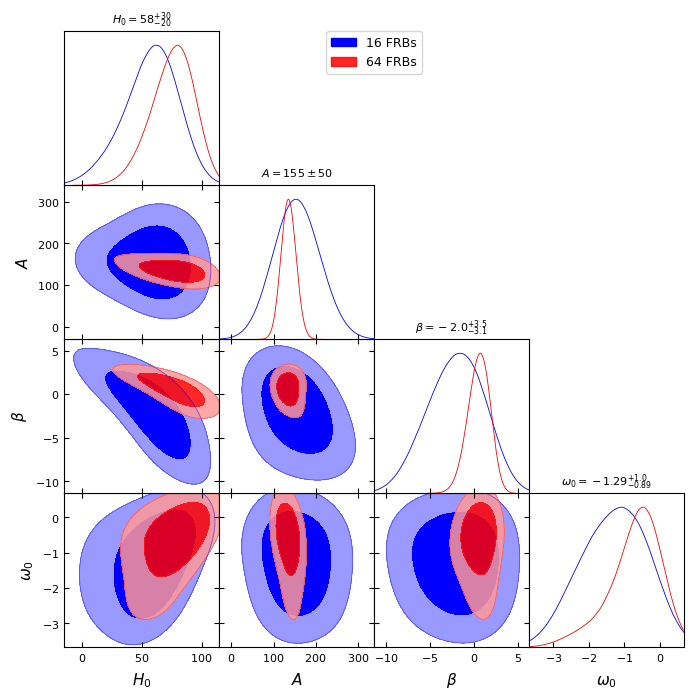

In [9]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples1_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples1_64.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples1_16, mcsamples1_64], filled=True, contour_colors=['blue', 'red'], 
                legend_labels=['16 FRBs', '64 FRBs'], 
                title_limit=1)
"""g.triangle_plot([mcsamples1_50], filled=True, contour_colors=['red'], 
                legend_labels=['P. 1 with 50 FRBs'], 
                title_limit=1)"""
g.export('Figuras/param_constant.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples2_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples2_64.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples2_16, mcsamples2_64], filled=True, contour_colors=['blue', 'red'], 
                legend_labels=['CPL with 16 FRBs', 'CPL with 50 FRBs'], 
                title_limit=1)
g.export('Figuras/param_CPL.png', dpi=600)

In [ ]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples3_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples3_64.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples3_16, mcsamples3_64], filled=True, contour_colors=['blue', 'red'], 
                legend_labels=['BA with 16 FRBs', 'BA with 50 FRBs'], 
                title_limit=1)
g.export('Figuras/param_BA.png', dpi=600)

In [ ]:
from ultranest.plot import PredictionBand
from equations import DM_EXT_model
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.errorbar(x=z_values_16, y=dm_ext_obs_16, fmt='ro', alpha=0.6, capsize=3, color='red', label='Data', ms=4)

z_test = np.linspace(0, 1, 100)

band = PredictionBand(z_test)
model_fit = DM_EXT_model()
# go through the solutions
for H_0, omega_0  in sampler_constant_16.results['samples']:
    # compute for each time the y value
    band.add(model_fit.DM_ext_th(z=z_test,
        f_IGM=0.83,
        DM_host_0=157,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        omega_0=omega_0,
        cosmo_type='non_standard',
        param_type='constant'))

band.line(color='k', linestyle='-', label='Parameterization 3', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/H_bestfit.png', format='png', dpi=600)

In [ ]:
plt.figure()
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.errorbar(x=z_values_50, y=dm_ext_obs_50, fmt='ro', alpha=0.6, color='red', label='Data', ms=4)

# go through the solutions
for H_0, omega_0  in sampler_constant_50.results['samples']:
    # compute for each time the y value
    band.add(model_fit.DM_ext_th(z=z_test,
        f_IGM=0.83,
        DM_host_0=157,
        model_type='constant',
        Omega_b=None,  
        Omega_m=None,     
        H_today=H_0,
        omega_0=omega_0,
        cosmo_type='non_standard',
        param_type='constant'))

band.line(color='k', linestyle='-', label='Parameterization 3', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/H_bestfit_50.png', format='png', dpi=600)